In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
import eli5
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import nltk
from sklearn.metrics import confusion_matrix
import spacy
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact
import requests
from bs4 import BeautifulSoup
# Commented out from Win environment
# from scrapy.selector import Selector
import lxml
import pandas as pd
import re
import time
import random
from textblob import TextBlob, Word
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from xgboost import XGBClassifier
import xgboost as xgb
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

%matplotlib inline

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\andre\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
job_site = 'https://au.indeed.com'
start_page = '&start='
page_count = ''
counter = 50
store_job = []
next_button_len = 2

In [4]:
url_indeed = 'https://au.indeed.com/jobs?q=%28python+or+sql%29++%28data+or+scientist+or+science+or+analyst+or+research+or+business+or+intelligence+or+analytics+or+statistics+or+Actuarial+or+actuary+or+%22data+engineer%22%29+-developer%2C+-clerk%2C+-software%2C+-network%2C+-security%2C+-programmer&sort=date&radius=50&limit=50'

In [5]:
def delay() -> None:
    time.sleep(random.uniform(15, 30))
    return None

In [6]:
def soup_req(url):
    req = requests.get(url)
    soup = BeautifulSoup(req.content,features='lxml')
    
    return soup

In [7]:
soup_indeed = soup_req(url_indeed)

In [8]:
link_indeed = soup_indeed.find_all('div', {'class': 'title'})

In [115]:
while next_button_len == 2:
    
    for p_job in link_indeed:
        row = {}
        join_site = [job_site, p_job.find('a')['href']]
        new_url = ''.join(join_site)
        new_soup = soup_req(new_url)

        row['job_title'] = new_soup.find('h3').text if new_soup.find('h3') else 'none'
        row['company_name'] = new_soup.find('div', attrs={'class': 'icl-u-lg-mr--sm icl-u-xs-mr--xs'}).text if new_soup.find('div', attrs={'class': 'icl-u-lg-mr--sm icl-u-xs-mr--xs'}) else 'none'
        row['location'] = new_soup.find_all(attrs={'class': 'jobsearch-JobMetadataHeader-iconLabel'})[0].text if new_soup.find_all(attrs={'class': 'jobsearch-JobMetadataHeader-iconLabel'}) else 'none'

        class_len = len(new_soup.find_all(attrs={'class': 'jobsearch-JobMetadataHeader-iconLabel'}))
        salary = 'none'
        position = 'none'

        for i in range(1,class_len):

            if i == 1:
                row['salary'] = new_soup.find_all(attrs={'class': 'jobsearch-JobMetadataHeader-iconLabel'})[1].text
                if row['salary'][0] != '$':
                    row['position'] = new_soup.find_all(attrs={'class': 'jobsearch-JobMetadataHeader-iconLabel'})[1].text
                    row['salary'] = 'none'
            elif i == 2: 
                row['salary'] = new_soup.find_all(attrs={'class': 'jobsearch-JobMetadataHeader-iconLabel'})[2].text

        row['job_desc'] = new_soup.find('div', attrs={'class': 'jobsearch-JobComponent-description'}).text

        store_job.append(row)
    
    counter += 50
    page_count = counter 
    next_page = ''.join([url_indeed, start_page, str(page_count)])
    delay()
    soup_indeed = soup_req(next_page)
    
    link_indeed = soup_indeed.find_all('div', {'class': 'title'})
    next_button_len = len(soup_indeed.find_all('span', attrs={'class': 'np'}))

### Read file

In [3]:
store_job = pd.read_csv('./Job_final_output_v7.csv',index_col=0)
store_job1 = pd.read_csv('./validation.csv')

In [4]:
# store_job = pd.read_csv('./Job_final_output.csv',index_col=0)
# store_joba = pd.read_csv('./Job_final_output_v2.csv',index_col=0)
# store_jobb = pd.read_csv('./Job_final_output_v3.csv',index_col=0)
# store_jobc = pd.read_csv('./Job_final_output_v4.csv',index_col=0)
# store_jobd = pd.read_csv('./Job_final_output_v5.csv',index_col=0)

In [5]:
# store_job = store_job.append(store_joba).append(store_jobb).append(store_jobc).reindex()
# store_job = store_joba.append(store_jobb).append(store_jobc).append(store_jobd).reindex()

In [6]:
# store_job.drop_duplicates(subset=['job_title', 'company_name','location',
#                            'salary'],
#                    keep='last', inplace=True)

In [4]:
store_job.shape

(10688, 5)

In [4]:
df_job = pd.DataFrame(store_job)
df_job1 = pd.DataFrame(store_job1)

In [6]:
# df_indeed = df_job.copy()
df_job.head()

,job_title,company_name,location,salary,job_desc
3,Junior Data Analyst/Scientist,International Institute of Data & Analytics,Sydney NSW,NaN,"In data science and big data analytics, the ID..."
5,Sr. Data Scientist,AWS Australia Pty Ltd,Sydney NSW,NaN,Strong communication and data presentation ski...
7,"Senior Data Scientist, DevOps Product Analytics",Atlassian,Sydney NSW,NaN,Play with our seriously large volume of analyt...
10,Graduate Environmental Scientist,Harwood Environmental Consultants,North Sydney NSW,NaN,To develop the skills required to achieve fiel...
11,Data Analyst / Junior Data Scientist,Freelancer.com,Sydney NSW,NaN,We are a data-driven company - data trumps opi...


In [11]:
# df_job.to_csv('Job_final_output.csv')

In [12]:
df_job.isnull().sum()

job_title          0
company_name      26
location         204
salary          8654
job_desc           0
dtype: int64

In [13]:
df_job.columns

Index(['job_title', 'company_name', 'location', 'salary', 'job_desc'], dtype='object')

In [5]:
df_job1.columns = ['job_desc1','company_name', 'company_rating', 'industry', 'job_desc',
       'job_title', 'location', 'salary', 'Bag_of_words']

In [15]:
df_job.dtypes

job_title       object
company_name    object
location        object
salary          object
job_desc        object
dtype: object

### Data Cleaning

##### Salary Column

In [6]:
df_job = df_job.reset_index(drop=True)

In [7]:
df_job['salary'] = df_job.salary.fillna(value=0)

In [8]:
df_job.at[df_job.loc[df_job.salary == 'none'].index,'salary'] = 0

In [9]:
salary_store = []
idx = 0

for i in df_job.salary:
    a = str(i)
    y = re.findall(r'(?:[\£\$\€]{1}[,\d]+.?\d*[0-9])',a)
    
    if len(y) > 0:
        z = float(re.sub(r'[^\d\.]','',y[0]))
        hdy = re.findall(r'hour|day|year',i)
        if 'hour'in hdy:
            z = z * 7.5 * 20 * 12
        elif 'day' in hdy:
            z = z * 20 * 12
        else:
            z
    else:
        z = 0
#          z = int("".join(map(str, random.sample(set([0, 50000, 100000, 150000, 200000, 250000, 300000]),1))))
    
    salary_store.append(z)
    df_job.salary[idx] = int(z)
    idx += 1

In [10]:
desc_store = []
df_job['desc_salary'] = df_job['salary']
idx = 0

for i in df_job.salary:
    a = str(i)
    y = re.findall(r'(?:[\£\$\€]{1}[,\d]+.?\d*[0-9])',a)
    
    if len(y) > 0:
        z = float(re.sub(r'[^\d\.]','',y[0]))
        if z < 100:
            z = z * 7.5 * 20 * 12
        elif z < 1000:
            z = z * 20 * 12
        else:
            z
    else:
        z = 0
    
    desc_store.append(z)
    df_job['desc_salary'][idx] = int(z)
    idx += 1

In [11]:
idx = 0

for i in df_job.salary:
    if i == 0:
       df_job['salary'][idx] = df_job['desc_salary'][idx]
    
    idx += 1

In [12]:
df_job['salary'] = df_job['salary'].astype('int64') 
df_job1['salary'] = df_job1['salary'].astype('int64') 

In [13]:
np.mean(df_job['salary'])

20245.74906437126

In [14]:
# Remove rows with zero salary
df_job.drop(index=df_job.loc[df_job['salary'] == 0].index,inplace=True)
df_job.drop(columns='desc_salary', axis=1, inplace=True)

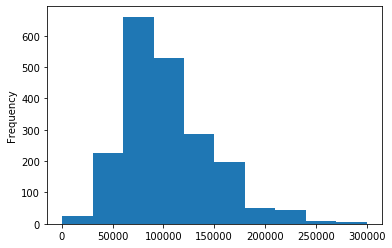

In [15]:
df_job['salary'].plot(kind='hist')

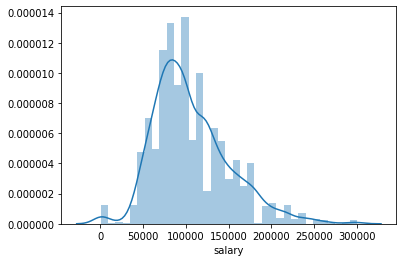

In [16]:
sns.distplot(df_job['salary'])

In [17]:
# salary_cat = ["Low", "High"]

df_job['salary_cat'] = pd.qcut(x=df_job['salary'], q=2, labels=['0', '1'])
df_job1['salary_cat'] = pd.qcut(x=df_job1['salary'], q=2, labels=['0', '1'])

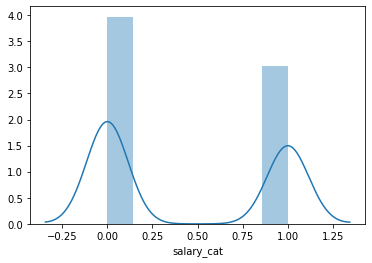

In [18]:
sns.distplot(df_job['salary_cat'])

In [21]:
df_job.groupby(by='salary_cat').size()

salary_cat
0    1153
1     881
dtype: int64

In [31]:
df_job1.groupby(by='salary_cat').size()

salary_cat
0    2375
1    2373
dtype: int64

In [41]:
df_job.isnull().sum()

job_title        0
company_name    15
location        88
salary           0
job_desc         0
salary_cat       0
dtype: int64

In [294]:
# df_job.dropna(inplace=True)

##### Comapny Column

In [19]:
df_job['company_name'] = df_job.company_name.fillna(value='Company not Available')
df_job1['company_name'] = df_job1.company_name.fillna(value='Company not Available')

##### Position Column

In [20]:
df_job['location'] = df_job.location.fillna(value='No Location')

In [21]:
df_job.isnull().sum()

job_title       0
company_name    0
location        0
salary          0
job_desc        0
salary_cat      0
dtype: int64

##### Description Column

###### Clean HTML

In [22]:
def cleanhtml(raw_html):
  cleanr = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
  cleantext = re.sub(cleanr, '', raw_html)
  return cleantext

###### Clean text

In [23]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [24]:
# df_job['description'] = df_job.job_desc.map(lambda x: cleanhtml(x)) 
df_job['description'] = df_job.job_desc.map(lambda x: clean_text(x))   
df_job.drop(columns='job_desc', inplace=True)

In [25]:
df_job1['description'] = df_job1.job_desc.map(lambda x: clean_text(x))  
df_job1.drop(columns='job_desc', inplace=True)

In [26]:
df_job = df_job.reset_index(drop=True)

In [32]:
from sklearn.preprocessing import OrdinalEncoder
def prepare_inputs(ds):
    oe = OrdinalEncoder()
    ds = oe.fit_transform(ds)
    return ds

In [100]:
# ## back to dataframe and add our headers
# # df = prepare_inputs(df_job)
# # df_job_new = pd.DataFrame(data=df, columns=df_job.columns)

# oe = OrdinalEncoder()
# ds = oe.fit_transform(df_job)
# df_job_new = pd.DataFrame(data=ds, columns=df_job.columns)

In [101]:
# from imblearn.over_sampling import SMOTE

# # Resample the minority class. You can change the strategy to 'auto' if you are not sure.
# sm = SMOTE(sampling_strategy='minority', random_state=7)

# # Fit the model to generate the data.
# oversampled_trainX, oversampled_trainY = sm.fit_sample(df_job_new.drop('salary', axis=1), df_job_new['salary'])
# # oversampled_trainX, oversampled_trainY = sm.fit_sample(df_job_new.drop('salary'), df_job_new['salary'])
# oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
# oversampled_train.columns = ['salary', 'job_title', 'company_name', 'location', 'position', 'description']

In [88]:
# def prepare_output(ds):
#     oe = OrdinalEncoder()
#     oe.fit(ds)
#     new_ds = oe.inverse_transform(ds)
#     return new_ds

In [33]:
# ## back to dataframe and add our headers
# df = oe.inverse_transform(oversampled_train)
# df_job_newer = pd.DataFrame(data=df, columns=oversampled_train.columns)

### Training

In [27]:
X_location = df_job['location']
X_title = df_job['job_title']
X_desc = df_job['description']
y1 = df_job['salary_cat'].values

In [28]:
stop = stopwords.words('english')
stop += ['apply', 'button', 'type', 'timesalary', 'eligibility', 'candidate', 'hour', 'try', 'abovefulljobdescription', 'var', 'ci', 'cd']
stop += ['restriction', 'hours', 'written', 'verbal', 'api', 'loadprovider', 'function', 'return', 'window', 'onmosaicapiready']
stop += ['belowfulljobdescription', 'ad', 'hoc', 'yearexperience', 'full', 'job', 'filter', 'mosaic', 'please', 'track', 'record']
stop += ['year', 'preferred', 'foreach', 'catch', 'providers', 'lazyfns', 'may', 'prefer', 'provider', 'win', 'write']
stop += ["'s", 'could', 'might', 'must', 'need', 'shall', 'would']

In [29]:
def split_into_lemmas(text):
    words = nlp(text)
    return [word.lemma_ for word in words]

In [30]:
import string
punctuations = string.punctuation
# Creating a Spacy Parser
from spacy.lang.en import English
parser = English()

In [31]:
def my_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stop and word not in punctuations ]
    return mytokens

In [32]:
tf = TfidfVectorizer(ngram_range=(2,5), stop_words=stop, min_df=0.001, max_features=1000, max_df=0.5,
                    tokenizer = my_tokenizer, binary=True) 

In [33]:
location_dtm = tf.fit_transform(X_location)
location_df = pd.DataFrame(location_dtm.toarray(),columns=tf.get_feature_names())

title_dtm = tf.fit_transform(X_title)
title_df = pd.DataFrame(title_dtm.toarray(),columns=tf.get_feature_names())

desc_dtm = tf.fit_transform(X_desc)
desc_df = pd.DataFrame(desc_dtm.toarray(),columns=tf.get_feature_names())

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(location_df, y1, random_state = 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(title_df, y1, random_state = 42)
X3_train, X3_test, y3_train, y3_test = train_test_split(desc_dtm, y1, random_state = 42)

In [35]:
lr1 = LogisticRegression(max_iter=5000)
lr1.fit(X1_train, y1_train)
y1_pred_class = lr1.predict(X1_test)
print('Location    ', metrics.accuracy_score(y1_test, y1_pred_class))

lr2 = LogisticRegression(max_iter=5000)
lr2.fit(X2_train, y2_train)
y2_pred_class = lr2.predict(X2_test)
print('Job Title   ', metrics.accuracy_score(y2_test, y2_pred_class))

lr3 = LogisticRegression(max_iter=5000)
lr3.fit(X3_train, y3_train)
y3_pred_class = lr3.predict(X3_test)
print('Description ', metrics.accuracy_score(y3_test, y3_pred_class))

Location     0.581532416502947
Job Title    0.7053045186640472
Description  0.630648330058939


In [36]:
conmat1 = np.array(confusion_matrix(y1_test, y1_pred_class, labels=['0','1']))

confusion1 = pd.DataFrame(conmat1, index=['is_Low','is_High'],
                               columns=['Predicted Low', 'Predicted High'])
    
confusion1

,Predicted Low,Predicted High
is_Low,262,28
is_High,185,34


In [37]:
print(classification_report(y1_test, y1_pred_class, labels=['0','1']))

              precision    recall  f1-score   support

           0       0.59      0.90      0.71       290
           1       0.55      0.16      0.24       219

    accuracy                           0.58       509
   macro avg       0.57      0.53      0.48       509
weighted avg       0.57      0.58      0.51       509



In [38]:
conmat2 = np.array(confusion_matrix(y2_test, y2_pred_class, labels=['0','1']))

confusion2 = pd.DataFrame(conmat2, index=['is_Low','is_High'],
                               columns=['Predicted Low', 'Predicted High'])
    
confusion2

,Predicted Low,Predicted High
is_Low,243,47
is_High,103,116


In [39]:
print(classification_report(y2_test, y2_pred_class, labels=['0','1']))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76       290
           1       0.71      0.53      0.61       219

    accuracy                           0.71       509
   macro avg       0.71      0.68      0.69       509
weighted avg       0.71      0.71      0.70       509



In [40]:
conmat3 = np.array(confusion_matrix(y3_test, y3_pred_class, labels=['0','1']))

confusion3 = pd.DataFrame(conmat3, index=['is_Low','is_High'],
                               columns=['Predicted Low', 'Predicted High'])
    
confusion3

,Predicted Low,Predicted High
is_Low,236,54
is_High,134,85


In [41]:
print(classification_report(y3_test, y3_pred_class, labels=['0','1']))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72       290
           1       0.61      0.39      0.47       219

    accuracy                           0.63       509
   macro avg       0.62      0.60      0.60       509
weighted avg       0.63      0.63      0.61       509



In [42]:
coeff1 = pd.DataFrame({'feature':location_df.columns, 'coefficient': lr1.coef_[0]**2})
    
coeff1.sort_values('coefficient', ascending=False, inplace=True)
coeff1.head(10)

,feature,coefficient
23,chatswood nsw,2.537550
16,canberra act,1.513535
68,parkville vic,0.810308
26,clayton vic,0.656096
10,brisbane qld,0.634452
61,melbourne vic,0.600110
80,richmond vic,0.498956
69,parramatta nsw,0.323600
101,sydney nsw,0.322926
46,inner west,0.297318


In [43]:
coeff2 = pd.DataFrame({'feature':title_df.columns, 'coefficient': lr2.coef_[0]**2})
    
coeff2.sort_values('coefficient', ascending=False, inplace=True)
coeff2.head(10)

,feature,coefficient
192,data architect,2.229237
97,bi developer,2.219432
507,recruitment consultant,2.101518
577,senior data,2.092311
518,research scientist,1.815956
635,solution architect,1.664521
610,senior software,1.564420
381,lead data,1.480965
488,principal engineer,1.480327
281,engineer sydney,1.409661


In [44]:
coeff3 = pd.DataFrame({'feature':desc_df.columns, 'coefficient': lr3.coef_[0]**2})
    
coeff3.sort_values('coefficient', ascending=False, inplace=True)
coeff3.head(10)

,feature,coefficient
282,data pipelines,2.957482
97,business analyst,2.678745
747,project manager,2.437622
152,cloud based,1.898940
720,performance data,1.751526
254,data governance,1.743659
474,great opportunity,1.609135
360,emotional intelligence,1.607425
250,data engineering,1.536065
225,data analyst,1.366135


In [45]:
rfc1 = RandomForestClassifier()
rfc1.fit(X1_train, y1_train)
rfc1_y1_pred_class = rfc1.predict(X1_test)
print(metrics.accuracy_score(y1_test, rfc1_y1_pred_class))

0.581532416502947


In [46]:
rfc1_conmat1 = np.array(confusion_matrix(y1_test, rfc1_y1_pred_class, labels=['0','1']))

rfc1_confusion1 = pd.DataFrame(rfc1_conmat1, index=['is_Low','is_High'],
                               columns=['Predicted Low', 'Predicted High'])
    
rfc1_confusion1

,Predicted Low,Predicted High
is_Low,260,30
is_High,183,36


In [47]:
print(classification_report(y1_test, rfc1_y1_pred_class, labels=['0','1']))

              precision    recall  f1-score   support

           0       0.59      0.90      0.71       290
           1       0.55      0.16      0.25       219

    accuracy                           0.58       509
   macro avg       0.57      0.53      0.48       509
weighted avg       0.57      0.58      0.51       509



In [48]:
feat_impt1 = pd.DataFrame({'feature':location_df.columns, 'importance':rfc1.feature_importances_})
  
feat_impt1.sort_values('importance', ascending=False, inplace=True)
feat_impt1.head(10)

,feature,importance
16,canberra act,0.167141
61,melbourne vic,0.087613
23,chatswood nsw,0.064410
10,brisbane qld,0.059175
101,sydney nsw,0.052720
69,parramatta nsw,0.031159
26,clayton vic,0.024842
78,perth wa,0.024440
68,parkville vic,0.023826
80,richmond vic,0.020782


In [49]:
rfc2 = RandomForestClassifier()
rfc2.fit(X2_train, y2_train)
rfc2_y2_pred_class = rfc2.predict(X2_test)
print(metrics.accuracy_score(y2_test, rfc2_y2_pred_class))

0.7092337917485265


In [50]:
rfc2_conmat2 = np.array(confusion_matrix(y2_test, rfc2_y2_pred_class, labels=['0','1']))

rfc2_confusion2 = pd.DataFrame(rfc2_conmat2, index=['is_Low','is_High'],
                               columns=['Predicted Low', 'Predicted High'])
    
rfc2_confusion2

,Predicted Low,Predicted High
is_Low,240,50
is_High,98,121


In [51]:
print(classification_report(y2_test, rfc2_y2_pred_class, labels=['0','1']))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       290
           1       0.71      0.55      0.62       219

    accuracy                           0.71       509
   macro avg       0.71      0.69      0.69       509
weighted avg       0.71      0.71      0.70       509



In [52]:
feat_impt2 = pd.DataFrame({'feature':title_df.columns, 'importance':rfc2.feature_importances_})
  
feat_impt2.sort_values('importance', ascending=False, inplace=True)
feat_impt2.head(10)

,feature,importance
112,business analyst,0.019470
195,data engineer,0.017885
179,data analyst,0.017844
635,solution architect,0.014057
577,senior data,0.013742
224,data scientist,0.013572
121,business intelligence,0.011951
498,project manager,0.011858
142,cloud engineer,0.011542
192,data architect,0.011399


In [53]:
rfc3 = RandomForestClassifier()
rfc3.fit(X3_train, y3_train)
rfc3_y3_pred_class = rfc3.predict(X3_test)
print(metrics.accuracy_score(y3_test, rfc3_y3_pred_class))

0.6365422396856582


In [54]:
rfc3_conmat3 = np.array(confusion_matrix(y3_test, rfc3_y3_pred_class, labels=['0','1']))

rfc3_confusion3 = pd.DataFrame(rfc3_conmat3, index=['is_Low','is_High'],
                               columns=['Predicted Low', 'Predicted High'])
    
rfc3_confusion3

,Predicted Low,Predicted High
is_Low,217,73
is_High,112,107


In [55]:
print(classification_report(y3_test, rfc3_y3_pred_class, labels=['0','1']))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       290
           1       0.59      0.49      0.54       219

    accuracy                           0.64       509
   macro avg       0.63      0.62      0.62       509
weighted avg       0.63      0.64      0.63       509



In [56]:
feat_impt3 = pd.DataFrame({'feature':desc_df.columns, 'importance':rfc3.feature_importances_})
  
feat_impt3.sort_values('importance', ascending=False, inplace=True)
feat_impt3.head(10)

,feature,importance
97,business analyst,0.014003
152,cloud based,0.013839
104,business intelligence,0.013451
282,data pipelines,0.011377
273,data management,0.010436
79,big data,0.009251
747,project manager,0.008440
295,data science,0.008065
474,great opportunity,0.007433
227,data analytics,0.007264


In [ ]:
             LogisticRegression  RandomForestClassifier
Location     0.581532416502947   0.581532416502947
Job Title    0.7053045186640472  0.7092337917485265
Description  0.630648330058939   0.6365422396856582

In [61]:
sect_1 = pd.DataFrame({'Feature': ['Location', 'Job Title', 'Description'], 
              'LogisticRegression': [0.581532416502947, 0.7053045186640472, 0.630648330058939], 
              'RandomForestClassifier': [0.581532416502947, 0.7092337917485265, 0.6365422396856582]})

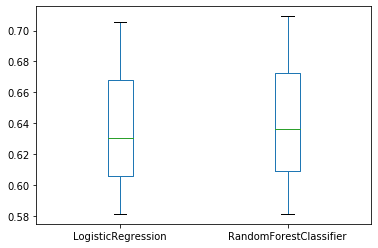

In [69]:
sect_1.plot(kind='box')

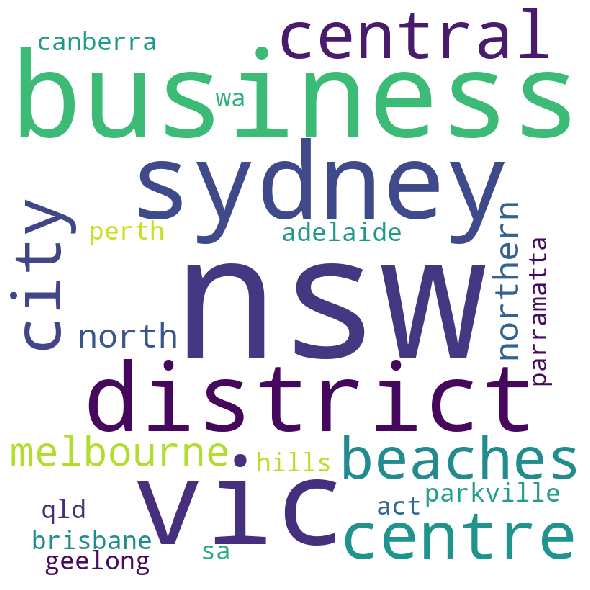

In [289]:
comment_words = ' '
# stopwords = set(STOPWORDS) 
 
# iterate through the csv file 
for val in location_df: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

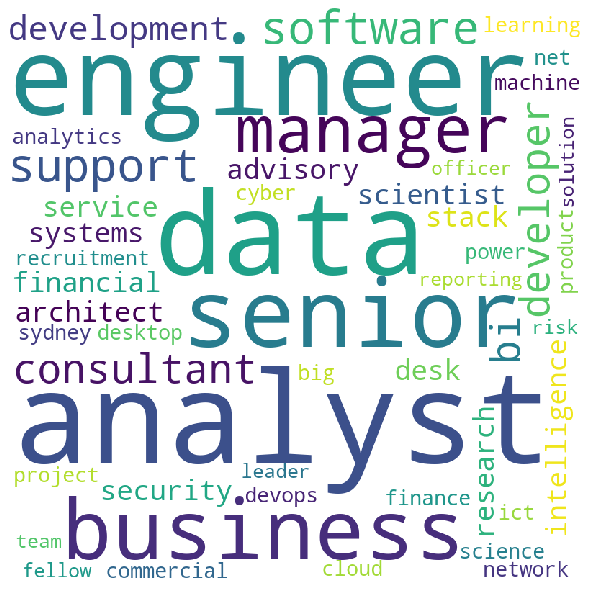

In [290]:
comment_words = ' '
# stopwords = set(STOPWORDS) 
 
# iterate through the csv file 
for val in title_df: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

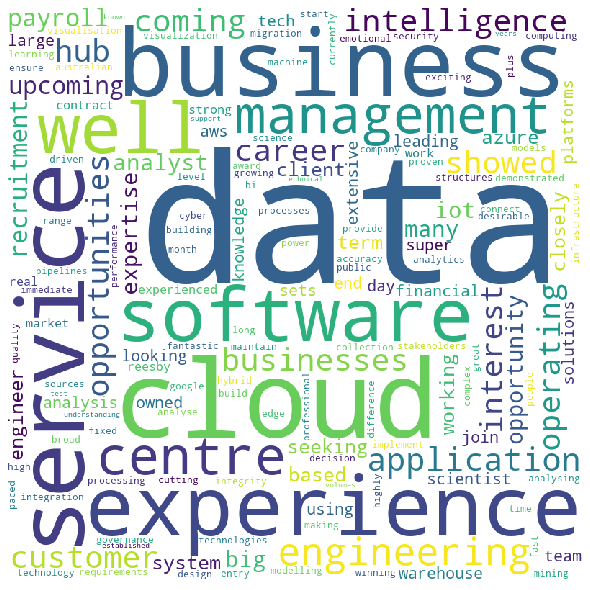

In [291]:
comment_words = ' '
# stopwords = set(STOPWORDS) 
 
# iterate through the csv file 
for val in desc_df: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Section 2

In [565]:
description = nltk.FreqDist(df_job['description']) 

# create dataframe
description_df = pd.DataFrame({'Title': list(description.keys()), 
                              'Count': list(description.values())})

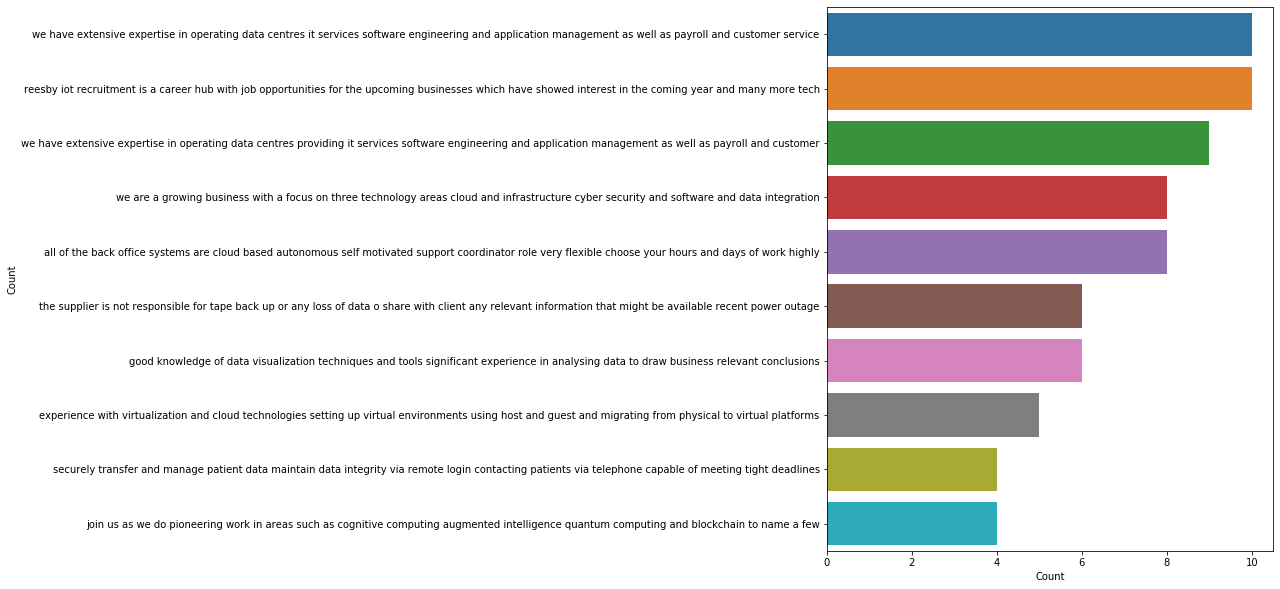

In [566]:
g = description_df.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(8,10)) 
ax = sns.barplot(data=g, x= "Count", y = "Title") 
ax.set(ylabel = 'Count') 
plt.show()

In [567]:
company_name = nltk.FreqDist(df_job['company_name']) 

# create dataframe
company_name_df = pd.DataFrame({'Title': list(company_name.keys()), 
                              'Count': list(company_name.values())})

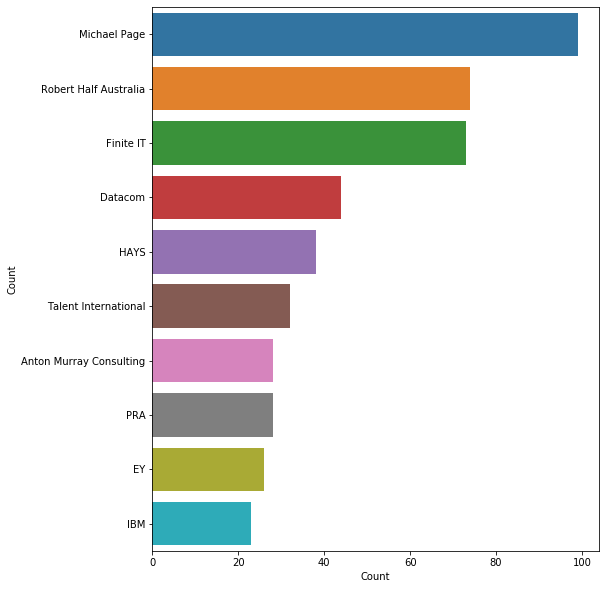

In [568]:
g = company_name_df.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(8,10)) 
ax = sns.barplot(data=g, x= "Count", y = "Title") 
ax.set(ylabel = 'Count') 
plt.show()

In [562]:
job_title = nltk.FreqDist(df_job['job_title']) 

# create dataframe
job_title_df = pd.DataFrame({'Title': list(job_title.keys()), 
                              'Count': list(job_title.values())})

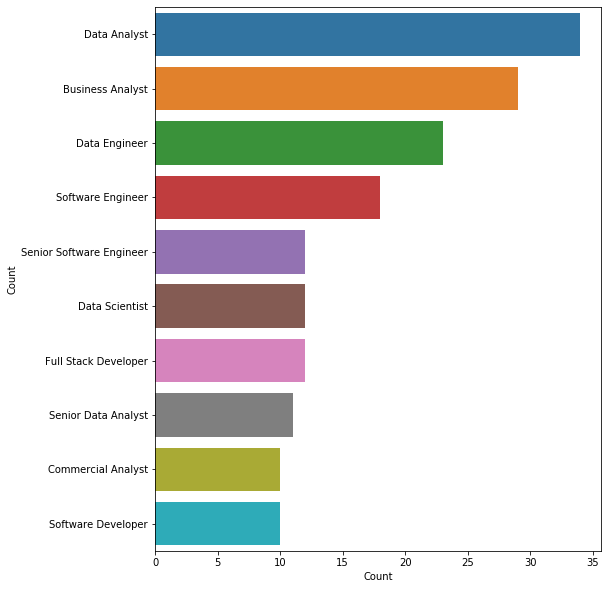

In [564]:
g = job_title_df.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(8,10)) 
ax = sns.barplot(data=g, x= "Count", y = "Title") 
ax.set(ylabel = 'Count') 
plt.show()

In [70]:
dummies = pd.get_dummies(df_job.job_title)

In [71]:
df_da = dummies['Data Analyst']
df_ds = dummies['Data Scientist']
df_de = dummies['Data Engineer']
df_data = pd.DataFrame([df_da, df_de, df_ds]).T
new_title = df_data.sum(axis = 1)
df_new_title = pd.DataFrame(new_title)
df_job['new_title'] = df_new_title

In [72]:
senior_level = df_job.job_title.str.contains('Senior|Sr|sr|senior', regex = True)
df_job['senior_level'] = senior_level.map(lambda x : int(x))

In [73]:
df_job['senior_level'].value_counts()

0    1763
1     271
Name: senior_level, dtype: int64

In [210]:
company_dtm = tf.fit_transform(df_job['company_name'])
company_df = pd.DataFrame(company_dtm.toarray(),columns=tf.get_feature_names())

In [229]:
X4 = desc_df
X5 = company_df
X6 = location_df

y2 = df_job['new_title']

In [230]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y2, random_state = 42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y2, random_state = 42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y2, random_state = 42)

In [231]:
data_tr4  = xgb.DMatrix(X4_train, label = y2_train)
data_cv4  = xgb.DMatrix(X4_test, label=y2_test)

data_tr5  = xgb.DMatrix(X5_train, label = y2_train)
data_cv5  = xgb.DMatrix(X5_test, label=y2_test)

data_tr6  = xgb.DMatrix(X6_train, label = y2_train)
data_cv6  = xgb.DMatrix(X6_test, label=y2_test)

In [232]:
parms = {'max_depth':8, #maximum depth of a tree
         'objective':'reg:logistic',
         'eta'      :0.3,
         'subsample':0.8,#SGD will use this percentage of data
         'lambda '  :4, #L2 regularization term,>1 more conservative 
         'colsample_bytree ':0.9,
         'colsample_bylevel':1,
         'min_child_weight': 10}
num_rounds = 30

In [233]:
train4_labels = data_tr4.get_label()
ratio = float(np.sum(train4_labels == 0)) / np.sum(train4_labels == 1)
params['scale_pos_weight'] = ratio

bst4 = xgb.train(params, data_tr4, num_rounds)
y_test_preds = (bst4.predict(data_cv4) > 0.5).astype('int')

In [234]:
pd.crosstab(
    pd.Series(y2_test, name = 'Actual job'),
    pd.Series(y_test_preds, name = 'Predicted job'),
    margins = True
)

Predicted job,0,1,All
Actual job,,,
0,95,15,110
1,5,2,7
All,100,17,117


In [235]:
print(classification_report(y2_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       492
           1       0.07      0.24      0.10        17

    accuracy                           0.86       509
   macro avg       0.52      0.56      0.51       509
weighted avg       0.94      0.86      0.90       509



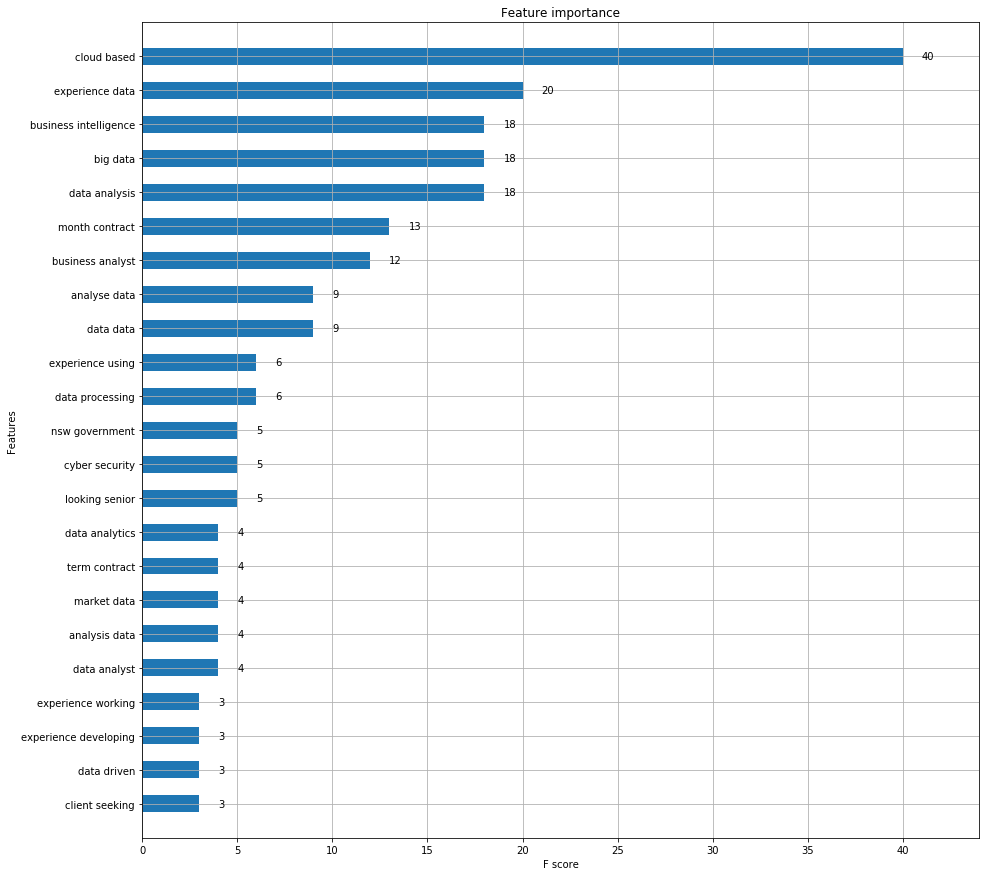

In [236]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(bst4,ax = axes,height = 0.5)
plt.show();plt.close()

In [198]:
train5_labels = data_tr5.get_label()
ratio = float(np.sum(train5_labels == 0)) / np.sum(train5_labels == 1)
params['scale_pos_weight'] = ratio

bst5 = xgb.train(params, data_tr5, num_rounds)
y_test_preds = (bst5.predict(data_cv5) > 0.5).astype('int')

In [199]:
pd.crosstab(
    pd.Series(y2_test, name = 'Actual job'),
    pd.Series(y_test_preds, name = 'Predicted job'),
    margins = True
)

Predicted job,0,1,All
Actual job,,,
0,102,8,110
1,7,0,7
All,109,8,117


In [200]:
print(classification_report(y2_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       492
           1       0.06      0.06      0.06        17

    accuracy                           0.94       509
   macro avg       0.52      0.51      0.51       509
weighted avg       0.94      0.94      0.94       509



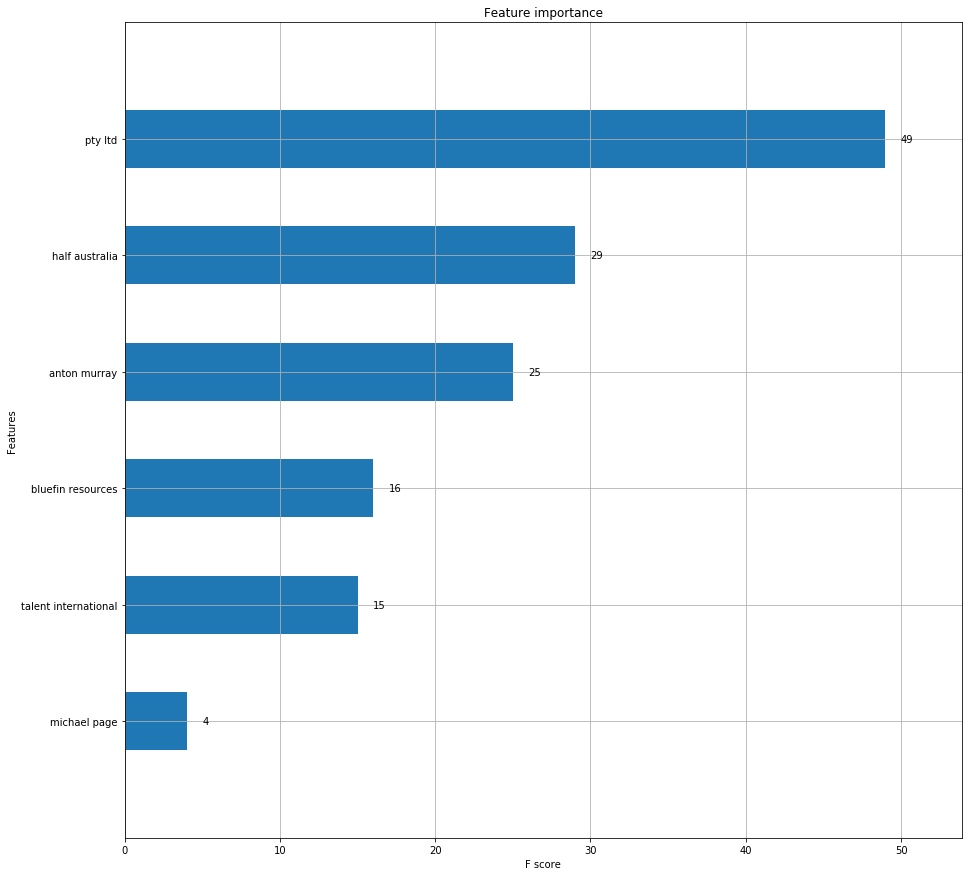

In [201]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(bst5,ax = axes,height = 0.5)
plt.show();plt.close()

In [203]:
train6_labels = data_tr6.get_label()
ratio = float(np.sum(train6_labels == 0)) / np.sum(train6_labels == 1)
params['scale_pos_weight'] = ratio

bst6 = xgb.train(params, data_tr6, num_rounds)
y_test_preds6 = (bst6.predict(data_cv6) > 0.5).astype('int')

In [204]:
pd.crosstab(
    pd.Series(y2_test, name = 'Actual job'),
    pd.Series(y_test_preds6, name = 'Predicted job'),
    margins = True
)

Predicted job,0,1,All
Actual job,,,
0,80,30,110
1,6,1,7
All,86,31,117


In [205]:
print(classification_report(y2_test, y_test_preds6))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76       492
           1       0.02      0.18      0.03        17

    accuracy                           0.62       509
   macro avg       0.49      0.40      0.40       509
weighted avg       0.93      0.62      0.74       509



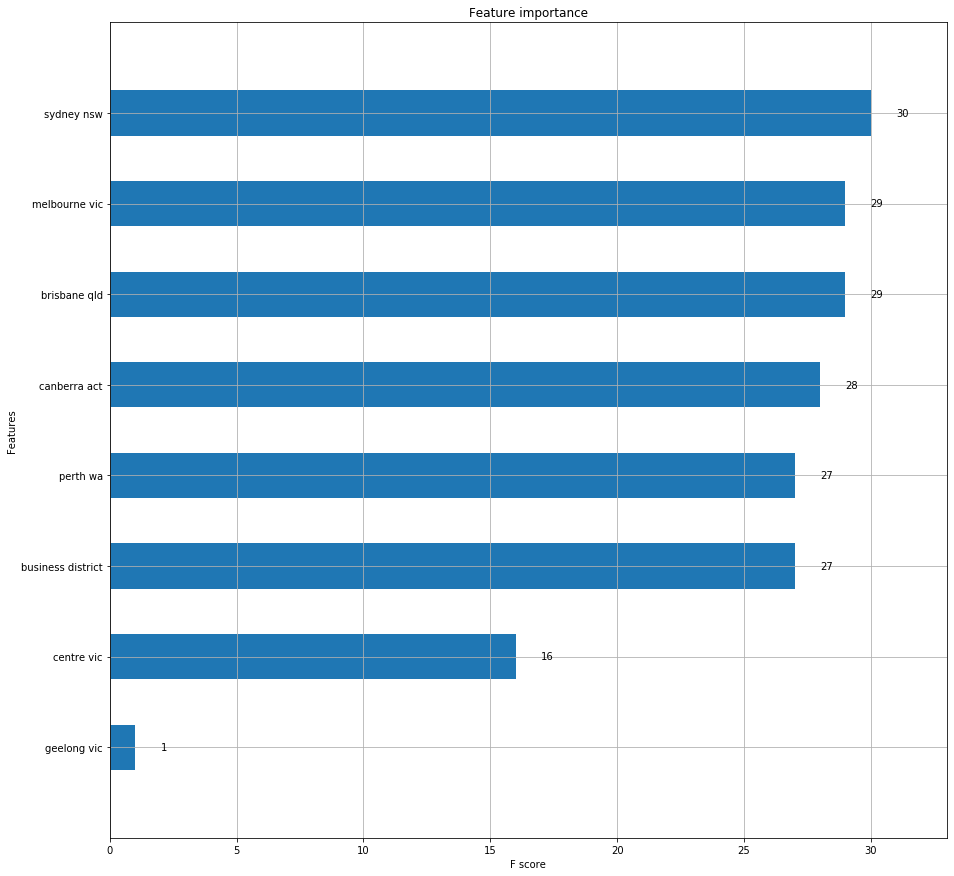

In [207]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(bst6,ax = axes,height = 0.5)
plt.show();plt.close()

### SVC Classifier

In [238]:
svc = SVC(kernel='linear')

In [239]:
svc.fit(X4_train, y4_train)
y4_pred_class = svc.predict(X4_test)
print('Description ', metrics.accuracy_score(y4_test, y4_pred_class))

Description  0.9548133595284872


In [240]:
svc_conmat = np.array(confusion_matrix(y4_test, y4_pred_class))

svc_confusion = pd.DataFrame(svc_conmat, index=['is_Low','is_High'],
                               columns=['Predicted Low', 'Predicted High'])
    
svc_confusion

,Predicted Low,Predicted High
is_Low,483,0
is_High,23,3


In [241]:
print(classification_report(y4_test, y4_pred_class))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       483
           1       1.00      0.12      0.21        26

    accuracy                           0.95       509
   macro avg       0.98      0.56      0.59       509
weighted avg       0.96      0.95      0.94       509



In [242]:
coeff = pd.DataFrame({'feature':desc_df.columns, 'coefficient': svc.coef_[0]**2})
    
coeff.sort_values('coefficient', ascending=False, inplace=True)
coeff.head(10)

,feature,coefficient
306,data sources,0.910578
878,sql server,0.885119
343,design implement,0.836784
394,experience big data,0.684237
653,multiple data,0.440931
395,experience big data technology,0.411380
889,structured unstructured data mining,0.411380
766,quantitative analysis,0.352782
413,experience within,0.341485
393,experience big,0.339873


In [243]:
svc.fit(X5_train, y5_train)
y5_pred_class = svc.predict(X5_test)
print('Company ', metrics.accuracy_score(y5_test, y5_pred_class))

Company  0.9489194499017681


In [244]:
svc_conmat = np.array(confusion_matrix(y5_test, y5_pred_class))

svc_confusion = pd.DataFrame(svc_conmat, index=['is_Low','is_High'],
                               columns=['Predicted Low', 'Predicted High'])
    
svc_confusion

,Predicted Low,Predicted High
is_Low,483,0
is_High,26,0


In [245]:
print(classification_report(y5_test, y5_pred_class))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        26

    accuracy                           0.95       509
   macro avg       0.47      0.50      0.49       509
weighted avg       0.90      0.95      0.92       509



C:\Users\andre\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [246]:
coeff = pd.DataFrame({'feature':company_df.columns, 'coefficient': svc.coef_[0]**2})
    
coeff.sort_values('coefficient', ascending=False, inplace=True)
coeff.head(10)

,feature,coefficient
202,salt recruitment,9.536743e-07
72,correlate resources,9.536743e-07
243,total global,9.536743e-07
143,ministry health,9.536743e-07
198,rmit university,9.536743e-07
232,tech mahindra,9.536743e-07
267,zone solutions,9.536743e-07
48,circuit recruitment group,3.274529e-07
47,circuit recruitment,3.274529e-07
152,northbridge recruitment propr,3.268816e-07


In [251]:
svc.fit(X6_train, y6_train)
y6_pred_class = svc.predict(X6_test)
print('Location ', metrics.accuracy_score(y6_test, y6_pred_class))

Location  0.9489194499017681


In [252]:
svc_conmat = np.array(confusion_matrix(y6_test, y6_pred_class))

svc_confusion = pd.DataFrame(svc_conmat, index=['is_Low','is_High'],
                               columns=['Predicted Low', 'Predicted High'])
    
svc_confusion

,Predicted Low,Predicted High
is_Low,483,0
is_High,26,0


In [253]:
print(classification_report(y6_test, y6_pred_class))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        26

    accuracy                           0.95       509
   macro avg       0.47      0.50      0.49       509
weighted avg       0.90      0.95      0.92       509



C:\Users\andre\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [254]:
coeff = pd.DataFrame({'feature':location_df.columns, 'coefficient': svc.coef_[0]**2})
    
coeff.sort_values('coefficient', ascending=False, inplace=True)
coeff.head(10)

,feature,coefficient
0,adelaide sa,0.0
86,st georges,0.0
84,south eastern suburbs vic,0.0
83,south eastern suburbs,0.0
82,south eastern,0.0
81,ryde nsw,0.0
80,richmond vic,0.0
79,randwick nsw,0.0
78,perth wa,0.0
77,perth st georges tce wa,0.0


In [103]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation

In [104]:
def split_into_blob(text):
    text = str(text).lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [105]:
tf_vectorizer = TfidfVectorizer(strip_accents='unicode', stop_words=stop, lowercase=True,  
                                token_pattern=r'\b[a-zA-Z]{3,}\b|\n', min_df=10, max_df=0.8, ngram_range=(2, 3))

In [107]:
dtm_tf = tf_vectorizer.fit_transform(Xd)

In [108]:
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [109]:
lda_vis_tf = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

In [110]:
pyLDAvis.display(lda_vis_tf)